In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HASU Historical Data(2).csv')

In [6]:
import pandas as pd

# Display the first few rows of the dataset to understand its structure
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        498 non-null    object 
 1   Price       498 non-null    float64
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(6), object(1)
memory usage: 27.4+ KB


(        Date  Price  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
 0  6/20/2022   32.2         NaN         NaN         NaN         NaN   
 1  6/21/2022   33.0         NaN         NaN         NaN         NaN   
 2  6/22/2022   33.0         NaN         NaN         NaN         NaN   
 3  6/23/2022   33.0         NaN         NaN         NaN         NaN   
 4  6/24/2022   35.0         NaN         NaN         NaN         NaN   
 
    Unnamed: 6  
 0         NaN  
 1         NaN  
 2         NaN  
 3         NaN  
 4         NaN  ,
 None)

In [7]:
# Drop the unnecessary columns
data_cleaned = data[['Date', 'Price']]

# Create a time index starting from t = 0
data_cleaned['TimeIndex'] = range(len(data_cleaned))

# Convert the 'Date' column to datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

# Display the cleaned data with the time index
data_cleaned.head()


<ipython-input-7-cd51c719757f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['TimeIndex'] = range(len(data_cleaned))
<ipython-input-7-cd51c719757f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])


,Date,Price,TimeIndex
0,2022-06-20,32.2,0
1,2022-06-21,33.0,1
2,2022-06-22,33.0,2
3,2022-06-23,33.0,3
4,2022-06-24,35.0,4


In [8]:
import numpy as np

# Calculate daily returns
data_cleaned['Returns'] = data_cleaned['Price'].pct_change()

# Calculate mean and standard deviation of the daily returns
mean_return = data_cleaned['Returns'].mean()
std_return = data_cleaned['Returns'].std()

# Display mean and standard deviation of returns
mean_return, std_return


<ipython-input-8-5027fee5f541>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Returns'] = data_cleaned['Price'].pct_change()


(0.001465988517159744, 0.023568170386912855)

In [9]:
data['Returns'] = data['Price'].pct_change()


In [10]:
mean_return = data['Returns'].mean()
std_return = data['Returns'].std()


In [12]:
import pandas as pd
import numpy as np

num_days = 20
last_price = data['Price'].iloc[-1]

simulated_prices = [last_price]
for _ in range(num_days):
    epsilon = np.random.normal()
    next_price = simulated_prices[-1] * np.exp((mean_return - 0.5 * std_return**2) + std_return * epsilon)
    simulated_prices.append(next_price)

# Convert 'Date' column to datetime objects if it is not already
data['Date'] = pd.to_datetime(data['Date'])

future_dates = pd.date_range(start=data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=num_days)
simulated_data = pd.DataFrame({'Date': future_dates, 'Simulated_Price': simulated_prices[1:]})

print(simulated_data)


         Date  Simulated_Price
0  2024-07-13        57.029605
1  2024-07-14        55.532118
2  2024-07-15        54.139039
3  2024-07-16        53.719229
4  2024-07-17        52.825543
5  2024-07-18        55.050900
6  2024-07-19        54.636194
7  2024-07-20        56.710030
8  2024-07-21        58.180452
9  2024-07-22        57.923733
10 2024-07-23        58.144784
11 2024-07-24        58.085946
12 2024-07-25        57.558249
13 2024-07-26        58.845003
14 2024-07-27        58.579496
15 2024-07-28        59.253070
16 2024-07-29        59.029285
17 2024-07-30        56.787977
18 2024-07-31        57.163831
19 2024-08-01        58.974295


In [14]:
# Calculate log returns
data['LogReturn'] = np.log(data['Price'] / data['Price'].shift(1))

# Estimate the drift and scale parameters
mu_GB = data['LogReturn'].mean()
sigma = data['LogReturn'].std()

mu_GB, sigma

(0.0011909837066137467, 0.023382021704588293)

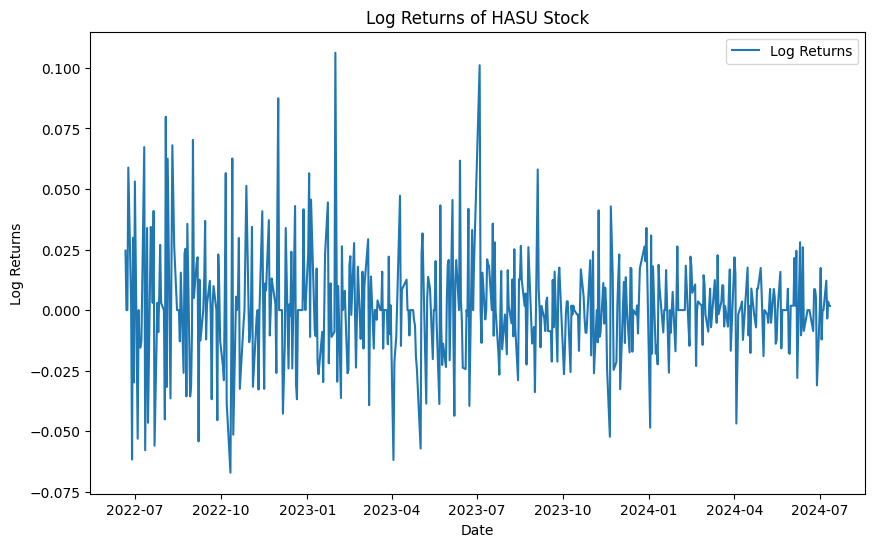

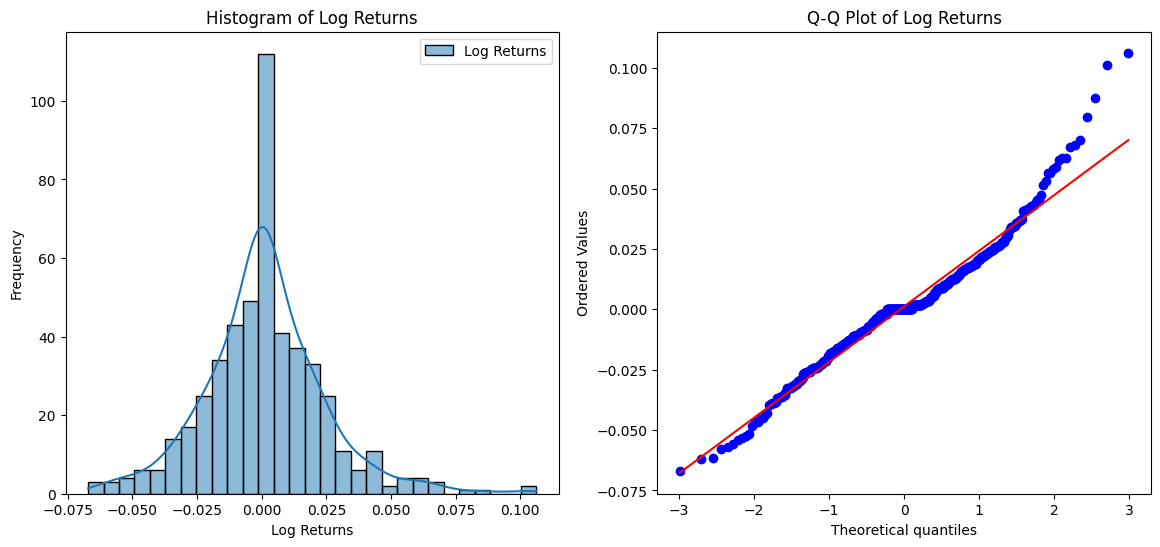

Shapiro-Wilk Test p-value: 9.793672591704428e-10
ADF Statistic: -7.32564631516179
p-value: 1.162988718082835e-10


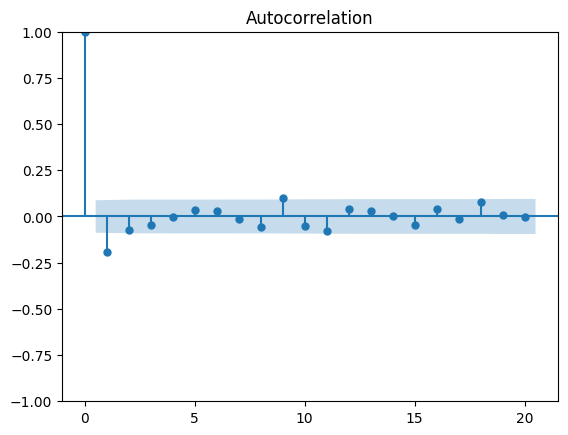

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, norm, probplot
from statsmodels.tsa.stattools import adfuller
# Plotting the log returns
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['LogReturn'], label='Log Returns')
plt.title('Log Returns of HASU Stock')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

# Histogram and Q-Q plot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['LogReturn'].dropna(), kde=True, label='Log Returns')
plt.title('Histogram of Log Returns')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
probplot(data['LogReturn'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Log Returns')
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = shapiro(data['LogReturn'].dropna())
print('Shapiro-Wilk Test p-value:', shapiro_test.pvalue)

# Augmented Dickey-Fuller test for stationarity
adf_test = adfuller(data['LogReturn'].dropna())
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])

# Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['LogReturn'].dropna(), lags=20)
plt.show()


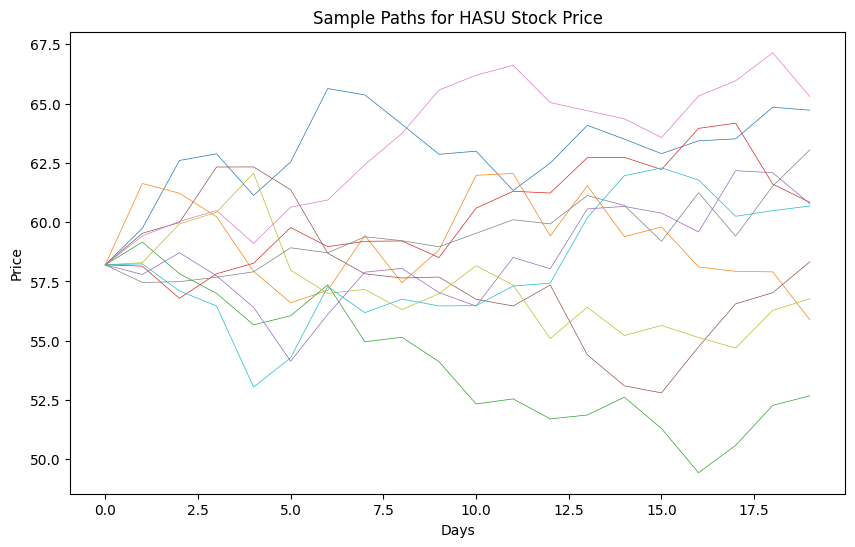

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,...,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000
1,59.741164,61.628486,59.160083,58.145297,57.794067,59.529923,59.418775,57.457009,58.291842,58.240380,...,56.550748,59.007518,57.426876,55.752415,58.874053,61.665213,58.470801,59.602114,59.365607,58.144258
2,62.599729,61.218794,57.826575,56.787635,58.709450,59.982563,60.028521,57.489980,59.923842,57.100327,...,56.877744,56.396670,55.019446,56.908584,60.729838,59.680576,59.970121,60.151918,60.302234,57.284864
3,62.880595,60.228791,57.000264,57.822948,57.743010,62.324835,60.488037,57.677470,60.415665,56.467416,...,58.377038,55.633267,54.243056,55.322697,61.347987,58.162395,60.547491,60.416828,58.914202,53.231480
4,61.127243,57.927633,55.670244,58.267115,56.411055,62.327410,59.109982,57.906084,62.065646,53.047333,...,57.090522,56.091778,54.368599,57.205526,59.334965,56.436935,60.178084,61.304691,60.652719,54.414347


In [18]:
# Parameters for the GBM simulation
num_simulations = 5000
num_days = 20
last_price = data_cleaned['Price'].iloc[-1]

# Simulate the next 20 days of price values for 5000 sample paths
simulated_paths = np.zeros((num_days, num_simulations))
simulated_paths[0] = last_price

for t in range(1, num_days):
    # Generate random values from a normal distribution
    epsilon = np.random.normal(size=num_simulations)
    # Calculate the next price based on the GBM formula
    simulated_paths[t] = simulated_paths[t-1] * np.exp((mu_GB - 0.5 * sigma**2) + sigma * epsilon)

# Plot a few sample paths
plt.figure(figsize=(10, 6))
for i in range(10):  # Plot 10 sample paths
    plt.plot(simulated_paths[:, i], lw=0.5)
plt.title('Sample Paths for HASU Stock Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

# Optional: Save the simulated paths to a DataFrame for further analysis
simulated_df = pd.DataFrame(simulated_paths)
simulated_df.head()


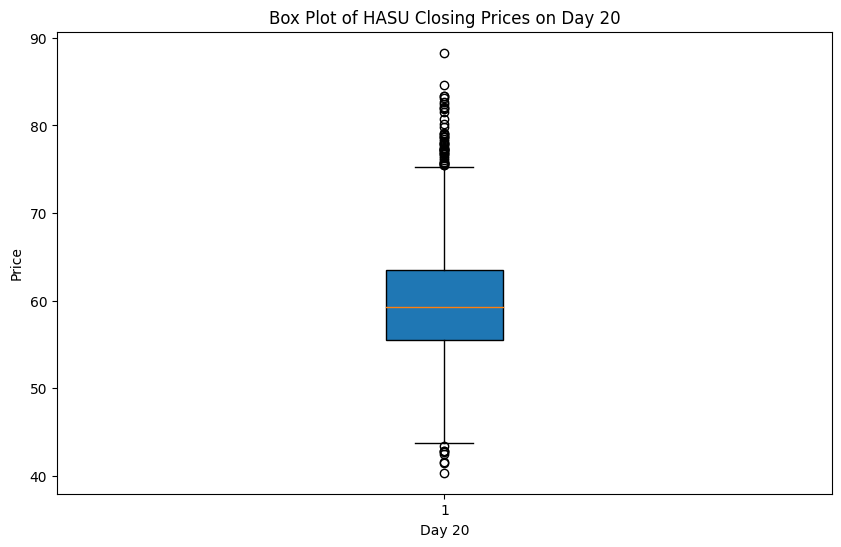

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already loaded your data and calculated mu_GB and sigma
# Also assuming data_cleaned is already available from previous steps

# Parameters for the GBM simulation
num_simulations = 5000
num_days = 20
last_price = data_cleaned['Price'].iloc[-1]

# Simulate the next 20 days of price values for 5000 sample paths
simulated_paths = np.zeros((num_days, num_simulations))
simulated_paths[0] = last_price

for t in range(1, num_days):
    # Generate random values from a normal distribution
    epsilon = np.random.normal(size=num_simulations)
    # Calculate the next price based on the GBM formula
    simulated_paths[t] = simulated_paths[t-1] * np.exp((mu_GB - 0.5 * sigma**2) + sigma * epsilon)

# Extract the closing prices from the last day of the simulation
closing_prices_day_20 = simulated_paths[-1]

# Create a box plot for the closing prices on day 20
plt.figure(figsize=(10, 6))
plt.boxplot(closing_prices_day_20, vert=True, patch_artist=True)
plt.title('Box Plot of HASU Closing Prices on Day 20')
plt.xlabel('Day 20')
plt.ylabel('Price')
plt.show()


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the probability that the closing price is between 55 and 60
price_range = (55, 60)
count_in_range = np.sum((closing_prices_day_20 >= price_range[0]) & (closing_prices_day_20 <= price_range[1]))
probability = count_in_range / num_simulations

print(f'Probability that the closing price is between {price_range[0]} and {price_range[1]}: {probability:.4f}')


Probability that the closing price is between 55 and 60: 0.3226


In [21]:
lower_bound = np.percentile(closing_prices_day_20, 2.5)
upper_bound = np.percentile(closing_prices_day_20, 97.5)

print(f'95% prediction interval for the closing price on day 20: ({lower_bound:.2f}, {upper_bound:.2f})')

95% prediction interval for the closing price on day 20: (48.81, 72.43)
